<a href="https://colab.research.google.com/github/ducqhl/python-for-ai/blob/main/week_06/Simple_PCA_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple PCA with Python

Trong phần này, chúng ta cùng làm một thử nghiệm nhỏ trên tập dữ liệu [Yale face database](https://drive.google.com/drive/folders/1KAKh8Tvb-WUnhkk4nMXnf1fHB78x1arU?usp=sharing). Các bức ảnh trong thí nghiệm này đã được căn chỉnh cho cùng với kích thước và khuôn mặt nằm trọn vẹn trong một hình chữ nhật có kích thước 116×98 pixel. Có tất cả 15 người khác nhau, mỗi người có 11 bức ảnh được chụp ở các điều kiện ánh sáng và cảm xúc khác nhau, bao gồm: ‘centerlight’, ‘glasses’, ‘happy’, ‘leftlight’, ‘noglasses’, ‘normal’, ‘rightlight’,’sad’, ‘sleepy’, ‘surprised’, và ‘wink’.



In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Configure the dataset parameters and file structure
path = '/content/drive/MyDrive/UIT_2025/Python_For_AI/imgs/'  # Directory path where all the face images are stored
ids = range(1, 16)  # Person IDs from 1 to 15 (total 15 different people)

# Different facial expressions and lighting conditions available for each person
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]  # 11 different states per person

# File naming convention components
prefix = 'subject'  # All files start with "subject"
surfix = '.pgm'     # All files end with ".pgm" (Portable Gray Map image format)

# Image dimensions - each face image has the same size
h = 243  # height in pixels - how tall each image is
w = 320  # width in pixels - how wide each image is
D = h * w  # Total number of pixels per image (243 × 320 = 77,760 pixels)
N = len(states)*15  # Total number of images (11 states × 15 people = 165 images)

# Create a matrix to store all image data
# Each column will represent one flattened image (all pixels in a single column)
# Shape: (77,760 pixels) × (165 images)
X = np.zeros((D, N))

In [11]:
# collect all data
cnt = 0
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = plt.imread(fn).reshape(D)
        cnt += 1

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # k = 100
pca.fit(X.T)

PCA(n_components=100)

In [13]:
# projection matrix
U = pca.components_.T

Hình  1


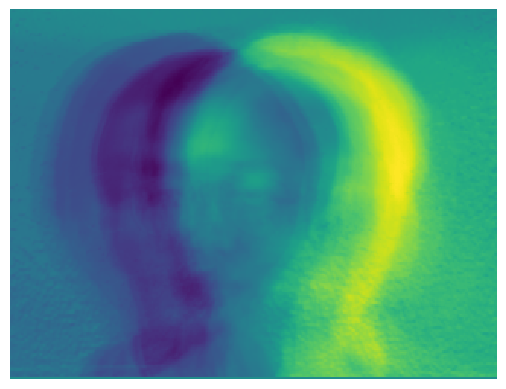

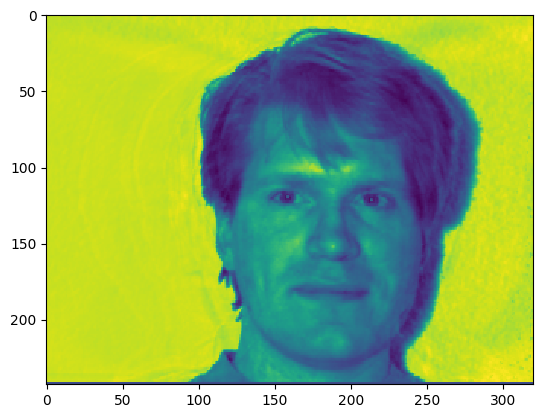

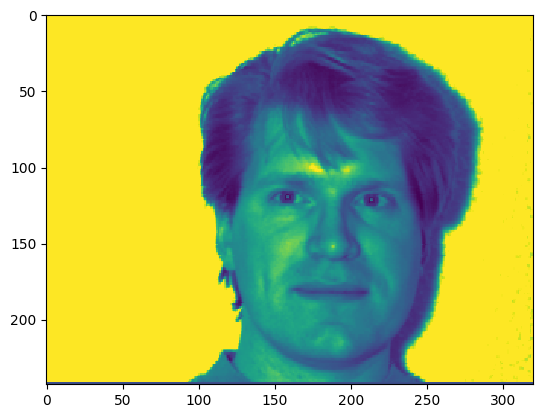

In [14]:
import matplotlib.pyplot as plt
for i in range(1):
  print("Hình ", i+1)
  plt.axis('off')
  f1 = plt.imshow(U[:, i].reshape(243, 320), interpolation='nearest')
  plt.show()

  # reshape and subtract mean
  x_hat = X[:, i].reshape(D, 1) - pca.mean_.reshape(D, 1)
  # encode
  z = U.T.dot(x_hat)
  #decode
  x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)
  f1 = plt.imshow(x_tilde.reshape(243, 320), interpolation='nearest')
  plt.show()

  f1 = plt.imshow(X[:, i].reshape(243, 320), interpolation='nearest')
  plt.show()